In [1]:
# Execute if necessary
# %%capture
# !pip install numpy seaborn matplotlib pandas

In [2]:
# Importamos las librerias necesarias
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from typing import Dict, Tuple, Union, List

# Práctica 3: Modelo Lineal

__Instrucciones__: A continuación hay una lista de funciones que debe implementar o tareas que debe desarrollar. La descripción de cada una de ellas se encuentra en la definición de cada una de las funciones. Cada función está marcada por &#x1F625;,  &#x1F643; o &#x1F921;. Las marcas indican:

- &#x1F625;: Indican una entrega que debe ser hecha dentro de la misma sesión de la asignación. 
- &#x1F643;: Indican una entrega que puede ser hecha hasta la siguiente sesión.
- &#x1F921;: Debe mostrar un avance en la misma sesión, pero la entrega puede ser hecha en la siguiente.

Aquellas entregas parciales que no sean hechas el día de la asignación ya no serán válidas para las entregas totales, sin embargo, las entregas totales seguirán siendo válidas.

En esta sección se incluye un dataset real. El dataset importado incluye multiples características que describen las condiciones de los pasajeros en el accidente del titanic.

- __PassengerId__: Identificador de cada pasajero.
- __Survived__: 0 si no sobrevivió al accidente, 1 si lo hizo.
- __Pclass__: Clase en la que viajaba el pasajero, 1 - Primera clase, 2 - Segunda clase y 3 - Tercera clase.
- __Name__: Nombre del pasajero.
- __Sex__: Sexo del pasajero.
- __Age__: Edad del pasajero.
- __SibSp__: Número de hermanos más número de esposas con las que viajaba el pasajero.
- __Parch__: Número de padres más número de hijos con las que viajaba el pasajero.
- __Ticket__: Número de boleto.
- __Fare__: Tarifa del boleto del pasajero.
- __Cabin__: Número de cabina del pasajero.
- __Embarked__: Puerto de embarcación, C - Cherbourg, Q - Queenstown y S - Southampton.


In [3]:
# Obtenemos el dataset
df = pd.read_csv("titanic.csv")
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Asignación 1 &#x1F625;

Realice el preprocesamiento que considere adecuado para que las características __Pclass__, __Sex__, __SibSp__, __Parch__, __Fare__, __Cabin__, __Embarked__ y __Survived__ puedan ser utilizadas por un modelo lineal.

In [4]:
# Obtenemos los atributos deseados
# No es necesario incluir la columna "Cabin"
new_df = df[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']]
new_df.head(5)

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Survived
0,3,male,1,0,7.2500,S,0
1,1,female,1,0,71.2833,C,1
2,3,female,0,0,7.9250,S,1
3,1,female,1,0,53.1000,S,1
4,3,male,0,0,8.0500,S,0


## Realizamos One Hot Encoder

In [5]:
# Utilizamos un One Hot Encoder para los atributos 'Sex', 'Embarked'
# Primero lo hacemos para la columna 'Sex'
ohe_sex = pd.get_dummies(new_df['Sex'], prefix = 'Sex')
new_df = new_df.drop('Sex', axis = 1)
new_df = new_df.join(ohe_sex)
# Procedemos con la columna 'Embarked'
ohe_embarked = pd.get_dummies(new_df['Embarked'], prefix = 'Embarked')
new_df = new_df.drop('Embarked', axis = 1)
new_df = new_df.join(ohe_embarked)

In [6]:
# Observamos las transformaciones en los atributos
new_df.dtypes

Pclass          int64
SibSp           int64
Parch           int64
Fare          float64
Survived        int64
Sex_female      uint8
Sex_male        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [7]:
# Imprimimos los primeros 5 registros
new_df.head(5)

,Pclass,SibSp,Parch,Fare,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0,7.2500,0,0,1,0,0,1
1,1,1,0,71.2833,1,1,0,1,0,0
2,3,0,0,7.9250,1,1,0,0,0,1
3,1,1,0,53.1000,1,1,0,0,0,1
4,3,0,0,8.0500,0,0,1,0,0,1


## Hacemos transformación respecto al skewness.

In [8]:
def calc_skewness(x) -> float:
    """
    Descripción:
    Esta funcion calcula el skewness de un atributo.
    
    Entradas:
    - x: Los samples de un atributo dado. 
            
    Salidas:
    - El cálculo de skewness.
    """
    return (((x-x.mean()) / x.var()**(1/2)) ** 3).mean()

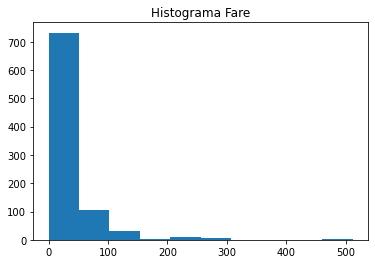

In [9]:
# Imprimimos el histograma de la columna 'Fare'
plt.hist(new_df['Fare'])
plt.title('Histograma Fare')
plt.show()

In [10]:
# Obtenemos skewness de la columna 'Fare'
calc_skewness(new_df['Fare'])

4.771209669373592

In [11]:
# Realizamos una transformación a la columna 'Fare'
new_df['Fare'] = new_df['Fare'] ** (1 / 2)

In [12]:
# Obtenemos el nuevo skewness
calc_skewness(new_df['Fare'])

2.0779894539935846

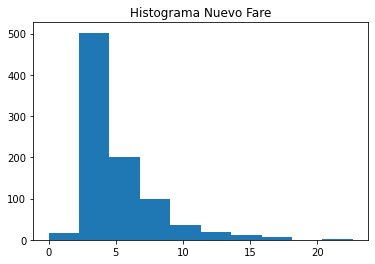

In [13]:
# Imprimimos el nuevo histograma
plt.hist(new_df['Fare'])
plt.title('Histograma Nuevo Fare')
plt.show()

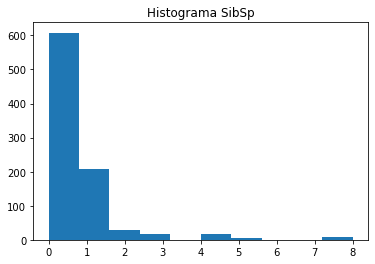

In [14]:
# Imprimimos el histograma de la columna 'SibSp'
plt.hist(new_df['SibSp'])
plt.title('Histograma SibSp')
plt.show()

In [15]:
# Obtenemos skewness de la columna 'SibSp'
calc_skewness(new_df['SibSp'])

3.682918775041469

In [16]:
# Realizamos una transformación a la columna 'SibSp'
new_df['SibSp'] = new_df['SibSp'] ** (1 / 2)

In [17]:
# Obtenemos el nuevo skewness
calc_skewness(new_df['SibSp'])

1.4316933042143771

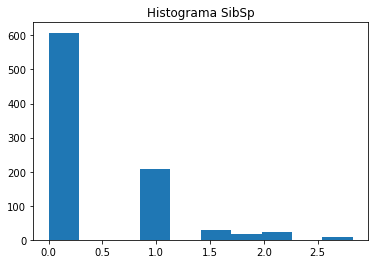

In [18]:
# Imprimimos el histograma de la columna 'SibSp' nuevo
plt.hist(new_df['SibSp'])
plt.title('Histograma SibSp')
plt.show()

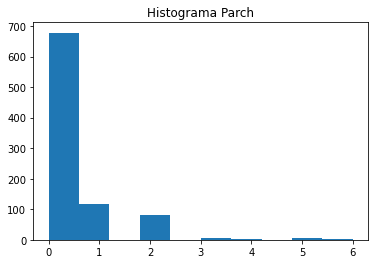

In [19]:
# Imprimimos el histograma de la columna 'Parch'
plt.hist(new_df['Parch'])
plt.title('Histograma Parch')
plt.show()

In [20]:
# Obtenemos skewness de la columna 'Parch'
calc_skewness(new_df['Parch'])

2.739867686513194

In [21]:
# Realizamos una transformación a la columna 'Parch'
new_df['Parch'] = new_df['Parch'] ** (1 / 2)

In [22]:
# Obtenemos skewness de la columna 'Parch'
calc_skewness(new_df['Parch'])

1.5246520886312096

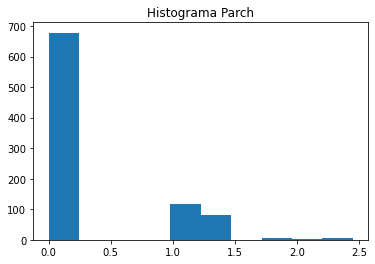

In [23]:
# Imprimimos el histograma de la columna 'Parch' nuevo
plt.hist(new_df['Parch'])
plt.title('Histograma Parch')
plt.show()

In [24]:
# Imprimimos los resultados despues de las transformaciones pertinentes
new_df.head(5)

,Pclass,SibSp,Parch,Fare,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,1.0,0.0,2.692582,0,0,1,0,0,1
1,1,1.0,0.0,8.442944,1,1,0,1,0,0
2,3,0.0,0.0,2.815138,1,1,0,0,0,1
3,1,1.0,0.0,7.286975,1,1,0,0,0,1
4,3,0.0,0.0,2.837252,0,0,1,0,0,1


## Normalización de datos

In [25]:
# Columnas a las cuales queremos realizar la transformación 
columns = ['SibSp', 'Parch', 'Fare']

In [26]:
# Realizar Normalización por columna
def normalization_column(data):
    new_data = (data - data.mean()) / data.std()
    return new_data

In [27]:
# Normalización de datos
def normalization_data(data, columns):
    for column in columns:
        data[column] = normalization_column(data[column])
    return data

In [28]:
# Normalizamos los datos
new_df = normalization_data(new_df, columns)

In [29]:
# Imprimimos los nuevos datos
new_df.head(5)

,Pclass,SibSp,Parch,Fare,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,1.003846,-0.539444,-0.732705,0,0,1,0,0,1
1,1,1.003846,-0.539444,1.219137,1,1,0,1,0,0
2,3,-0.629184,-0.539444,-0.691106,1,1,0,0,0,1
3,1,1.003846,-0.539444,0.826767,1,1,0,0,0,1
4,3,-0.629184,-0.539444,-0.683600,0,0,1,0,0,1


In [30]:
# Describimos los resultados
new_df.describe()

,Pclass,SibSp,Parch,Fare,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,8.910000e+02,8.910000e+02,8.910000e+02,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,1.123929e-16,-6.165414e-16,1.579108e-15,0.383838,0.352413,0.647587,0.188552,0.086420,0.722783
std,0.836071,1.000000e+00,1.000000e+00,1.000000e+00,0.486592,0.477990,0.477990,0.391372,0.281141,0.447876
min,1.000000,-6.291841e-01,-5.394444e-01,-1.646647e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,-6.291841e-01,-5.394444e-01,-6.919874e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,-6.291841e-01,-5.394444e-01,-3.561810e-01,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,1.003846e+00,-5.394444e-01,2.432165e-01,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,3.989722e+00,3.964047e+00,6.036236e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Asignación 2 &#x1F625;

Utilizando las características __Pclass__, __Sex__, __SibSp__, __Parch__, __Fare__, __Cabin__ y __Embarked__, entrene un clasificador lineal para predecir __Survived__ utilizando el algoritmo _pocket_. Imprima el error obtenido.

In [31]:
# Obtenemos X
X = new_df.drop('Survived', axis = 1).to_numpy()
# Obtenemos y
y = new_df['Survived'].to_numpy()

In [32]:
class PocketLinearClassifier:
    
    def __init__(self, max_iterations = 100):
        self.max_iterations = max_iterations
        
    def fit(self, X, y):
        # Agregamos una columna con valor uno a la matriz X
        X = np.insert(X, 0, 1, axis = 1)
        # Transformamos y
        y[y == 0] = -1
        # Inicializamos un vector w
        w = np.zeros(X.shape[1])
        # Inicializamos el mejor vector de pesos y el menor error de clasificación
        best_w = np.copy(w)
        best_error = len(X)
        # Iteramos el máximos número de iteraciones
        for i in range(self.max_iterations):
            # Calculamos las clasificaciones predichas
            y_pred = np.sign(np.dot(X, w))
            # Actualizamos w con PLA
            missclasified_index = [j for j in range(len(y)) if y[j] != y_pred[j]]
            choose_missclassified = np.random.choice(missclasified_index, 1)[0]
            w = w + (y[choose_missclassified] * X[choose_missclassified])
            # Obtenemos el error del nuevo w
            y_pred = np.sign(np.dot(X, w))
            # Calculamos el error de clasificación
            different = np.array([1 if y[j] != y_pred[j] else 0 for j in range(len(y))])
            error = different.sum() / len(y)
            print("Iteración {}:".format(i + 1))
            print("\tError: {}".format(error))
            # Actualizamos el mejor w y el mejor error si necesario
            if error < best_error:
                print("\t\tSe encontro mejor w actual")
                best_w = np.copy(w)
                best_error = error
            # Si no hay error, terminamos el entrenamiento
            if error == 0:
                print("Se encontro el mejor w del entrenamiento")
                break
        # Enviamos los mejores resultados
        self.coef_ = best_w
        self.error_ = best_error
        y[y == -1] = 0
        return self
    
    def predict(self, X):
        X = np.insert(X, 0, 1, axis = 1)
        # Calculamos las clasifiaciones 
        y_pred = np.sign(np.dot(X, self.coef_))
        y_pred[y_pred == -1 ] = 0
        y_pred[y_pred == 1] = 1
        return y_pred

In [33]:
# Generamos nuestro objeto para entrenar
plr = PocketLinearClassifier(max_iterations = 1000)

In [34]:
# Entrenamos modelo
plr.fit(X, y)

Iteración 1:
	Error: 0.6161616161616161
		Se encontro mejor w actual
Iteración 2:
	Error: 0.30976430976430974
		Se encontro mejor w actual
Iteración 3:
	Error: 0.3681257014590348
Iteración 4:
	Error: 0.3445566778900112
Iteración 5:
	Error: 0.31200897867564537
Iteración 6:
	Error: 0.3367003367003367
Iteración 7:
	Error: 0.27497194163860833
		Se encontro mejor w actual
Iteración 8:
	Error: 0.34118967452300786
Iteración 9:
	Error: 0.5566778900112234
Iteración 10:
	Error: 0.3490460157126824
Iteración 11:
	Error: 0.5723905723905723
Iteración 12:
	Error: 0.29292929292929293
Iteración 13:
	Error: 0.5847362514029181
Iteración 14:
	Error: 0.35914702581369246
Iteración 15:
	Error: 0.5802469135802469
Iteración 16:
	Error: 0.36363636363636365
Iteración 17:
	Error: 0.34118967452300786
Iteración 18:
	Error: 0.2850729517396184
Iteración 19:
	Error: 0.6105499438832772
Iteración 20:
	Error: 0.5869809203142536
Iteración 21:
	Error: 0.3108866442199775
Iteración 22:
	Error: 0.5645342312008979
Iteración 23

Iteración 218:
	Error: 0.6161616161616161
Iteración 219:
	Error: 0.31874298540965207
Iteración 220:
	Error: 0.31200897867564537
Iteración 221:
	Error: 0.287317620650954
Iteración 222:
	Error: 0.265993265993266
Iteración 223:
	Error: 0.29292929292929293
Iteración 224:
	Error: 0.24242424242424243
Iteración 225:
	Error: 0.2760942760942761
Iteración 226:
	Error: 0.5353535353535354
Iteración 227:
	Error: 0.28619528619528617
Iteración 228:
	Error: 0.2884399551066218
Iteración 229:
	Error: 0.24915824915824916
Iteración 230:
	Error: 0.3378226711560045
Iteración 231:
	Error: 0.2615039281705948
Iteración 232:
	Error: 0.27497194163860833
Iteración 233:
	Error: 0.2648709315375982
Iteración 234:
	Error: 0.27946127946127947
Iteración 235:
	Error: 0.5600448933782267
Iteración 236:
	Error: 0.27048260381593714
Iteración 237:
	Error: 0.5140291806958474
Iteración 238:
	Error: 0.2760942760942761
Iteración 239:
	Error: 0.5959595959595959
Iteración 240:
	Error: 0.2738496071829405
Iteración 241:
	Error: 0.31

Iteración 423:
	Error: 0.3288439955106622
Iteración 424:
	Error: 0.2760942760942761
Iteración 425:
	Error: 0.3490460157126824
Iteración 426:
	Error: 0.250280583613917
Iteración 427:
	Error: 0.2940516273849607
Iteración 428:
	Error: 0.2558922558922559
Iteración 429:
	Error: 0.25252525252525254
Iteración 430:
	Error: 0.33557800224466894
Iteración 431:
	Error: 0.2727272727272727
Iteración 432:
	Error: 0.5925925925925926
Iteración 433:
	Error: 0.2940516273849607
Iteración 434:
	Error: 0.3041526374859708
Iteración 435:
	Error: 0.27048260381593714
Iteración 436:
	Error: 0.3164983164983165
Iteración 437:
	Error: 0.26374859708193044
Iteración 438:
	Error: 0.28619528619528617
Iteración 439:
	Error: 0.27497194163860833
Iteración 440:
	Error: 0.3063973063973064
Iteración 441:
	Error: 0.26262626262626265
Iteración 442:
	Error: 0.2783389450056117
Iteración 443:
	Error: 0.22895622895622897
Iteración 444:
	Error: 0.5858585858585859
Iteración 445:
	Error: 0.5218855218855218
Iteración 446:
	Error: 0.53

Iteración 631:
	Error: 0.6083052749719416
Iteración 632:
	Error: 0.23007856341189675
Iteración 633:
	Error: 0.28058361391694725
Iteración 634:
	Error: 0.24242424242424243
Iteración 635:
	Error: 0.5375982042648709
Iteración 636:
	Error: 0.244668911335578
Iteración 637:
	Error: 0.2996632996632997
Iteración 638:
	Error: 0.2334455667789001
Iteración 639:
	Error: 0.49719416386083054
Iteración 640:
	Error: 0.6172839506172839
Iteración 641:
	Error: 0.5465768799102132
Iteración 642:
	Error: 0.27048260381593714
Iteración 643:
	Error: 0.5342312008978676
Iteración 644:
	Error: 0.2570145903479237
Iteración 645:
	Error: 0.3176206509539843
Iteración 646:
	Error: 0.24354657687991021
Iteración 647:
	Error: 0.3221099887766554
Iteración 648:
	Error: 0.24242424242424243
Iteración 649:
	Error: 0.29741863075196406
Iteración 650:
	Error: 0.6161616161616161
Iteración 651:
	Error: 0.2839506172839506
Iteración 652:
	Error: 0.2345679012345679
Iteración 653:
	Error: 0.3367003367003367
Iteración 654:
	Error: 0.23

Iteración 845:
	Error: 0.2244668911335578
Iteración 846:
	Error: 0.29068462401795736
Iteración 847:
	Error: 0.26374859708193044
Iteración 848:
	Error: 0.2783389450056117
Iteración 849:
	Error: 0.2839506172839506
Iteración 850:
	Error: 0.34231200897867564
Iteración 851:
	Error: 0.2671156004489338
Iteración 852:
	Error: 0.24803591470258138
Iteración 853:
	Error: 0.5634118967452301
Iteración 854:
	Error: 0.5342312008978676
Iteración 855:
	Error: 0.24691358024691357
Iteración 856:
	Error: 0.5813692480359147
Iteración 857:
	Error: 0.22671156004489337
Iteración 858:
	Error: 0.5735129068462402
Iteración 859:
	Error: 0.22895622895622897
Iteración 860:
	Error: 0.4725028058361392
Iteración 861:
	Error: 0.24354657687991021
Iteración 862:
	Error: 0.2828282828282828
Iteración 863:
	Error: 0.2738496071829405
Iteración 864:
	Error: 0.2558922558922559
Iteración 865:
	Error: 0.6161616161616161
Iteración 866:
	Error: 0.24691358024691357
Iteración 867:
	Error: 0.6161616161616161
Iteración 868:
	Error: 0.

In [35]:
# Imprimimos el mejor error
plr.error_

0.19640852974186307

In [36]:
# Predeicmos
y_pred = plr.predict(X)

In [37]:
# Generamos las tablas
from tabulate import tabulate
table = [[y[i], y_pred[i]] for i in range(len(y))]
headers =  ['y', 'y_pred']
print(tabulate(table, headers, tablefmt = "github"))

|   y |   y_pred |
|-----|----------|
|   0 |        0 |
|   1 |        1 |
|   1 |        1 |
|   1 |        1 |
|   0 |        0 |
|   0 |        0 |
|   0 |        0 |
|   0 |        0 |
|   1 |        1 |
|   1 |        1 |
|   1 |        0 |
|   1 |        1 |
|   0 |        0 |
|   0 |        0 |
|   0 |        1 |
|   1 |        1 |
|   0 |        0 |
|   1 |        0 |
|   0 |        0 |
|   1 |        1 |
|   0 |        0 |
|   1 |        0 |
|   1 |        1 |
|   1 |        0 |
|   0 |        0 |
|   1 |        0 |
|   0 |        0 |
|   0 |        0 |
|   1 |        1 |
|   0 |        0 |
|   0 |        0 |
|   1 |        1 |
|   1 |        1 |
|   0 |        0 |
|   0 |        0 |
|   0 |        0 |
|   1 |        0 |
|   0 |        0 |
|   0 |        0 |
|   1 |        0 |
|   0 |        0 |
|   0 |        1 |
|   0 |        0 |
|   1 |        1 |
|   1 |        1 |
|   0 |        0 |
|   0 |        0 |
|   1 |        1 |
|   0 |        0 |
|   0 |        0 |
|   0 |     

In [38]:
# Imprimimos los coeficientes
plr.coef_

array([ 3.        , -4.        , -1.47383696,  0.24437773,  0.190953  ,
        8.        , -5.        ,  1.        ,  1.        ,  1.        ])

## Asignación 3 &#x1F625;

Utilizando las características __Pclass__, __Sex__, __SibSp__, __Parch__, __Cabin__ y __Embarked__, entrene una regresión lineal para predecir __Fare__ utilizando el algoritmo de Ordinary Leasts Squares (OLS). Imprima el valor del error cuadrático medio (MSE).

In [39]:
# Obtenemos X
X = new_df.drop('Survived', axis = 1)
X = X.drop('Fare', axis = 1).to_numpy()
# Obtenemos y
y = new_df['Fare'].to_numpy()

In [40]:
class OrdinartLeastsSquares:
    
    def fit(self, X, y):
        # Agregamos una columna con valor uno a la matriz X
        X = np.insert(X, 0, 1, axis = 1)
        coef, res, _, __ = np.linalg.lstsq(X, y, rcond = None)
        self.coef_ = coef
        return self
    
    def fit_implementation(self, X, y):
        #pseudo_invers = np.linalg.inv(X.T @ X) @ X.T
        #coef = pseudo_invers @ y
        #self.extra_coef = coef
        X = np.insert(X, 0, 1, axis = 1)
        coef = np.matmul(np.linalg.pinv(X), y)
        self.extra_coef = coef
        return self
    
    def predict(self, X):
        X = np.insert(X, 0, 1, axis = 1)
        # Realizamos las predicciones
        y_pred = X.dot(self.coef_)
        return y_pred
    
    def predict_implementation(self, X):
        X = np.insert(X, 0, 1, axis = 1)
        y_pred = X.dot(self.extra_coef)
        return y_pred
    
    def mse(self, y, y_pred):
        diff = y_pred - y
        diff = diff ** 2
        mse_result = diff.mean()
        return mse_result

In [41]:
# Generamos nuestro objeto para entrenar
ols = OrdinartLeastsSquares()

In [42]:
# Entrenamos modelo
ols.fit(X, y)

In [43]:
# Predecimos el modelo
y_pred = ols.predict(X)

In [44]:
# Visualizamos el error
ols.mse(y, y_pred)

0.40755986452183146

In [45]:
# Generamos las tablas
from tabulate import tabulate
table = [[y[i], y_pred[i]] for i in range(len(y))]
headers =  ['y', 'y_pred']
print(tabulate(table, headers, tablefmt = "github"))

|           y |      y_pred |
|-------------|-------------|
| -0.732705   | -0.528875   |
|  1.21914    |  1.41377    |
| -0.691106   | -0.770281   |
|  0.826767   |  1.07438    |
| -0.6836     | -0.874312   |
| -0.659479   | -0.758555   |
|  0.797776   |  0.624913   |
| -0.0884105  |  0.101732   |
| -0.514086   | -0.236092   |
|  0.214677   |  0.664157   |
| -0.259547   | -0.0471153  |
|  0.102321   |  0.728943   |
| -0.6836     | -0.874312   |
|  0.25158    |  0.315753   |
| -0.695384   | -0.770281   |
| -0.288929   | -0.0206691  |
|  0.185172   |  0.310048   |
| -0.422817   | -0.1247     |
| -0.20657    | -0.424844   |
| -0.734282   | -0.430892   |
|  0.0841106  | -0.1247     |
| -0.422817   | -0.1247     |
| -0.684845   | -0.654525   |
|  0.375738   |  0.624913   |
| -0.0884105  |  0.205762   |
|  0.254991   |  0.419784   |
| -0.734282   | -0.534922   |
|  3.85798    |  1.75742    |
| -0.693872   | -0.654525   |
| -0.692868   | -0.874312   |
|  0.140468   |  0.964302   |
|  2.462  

In [46]:
ols.fit_implementation(X, y)

In [47]:
y_imp = ols.predict_implementation(X)

In [48]:
ols.mse(y, y_imp)

0.40755986452183146

In [49]:
# Generamos las tablas
from tabulate import tabulate
table = [[y[i], y_imp[i], y_pred[i]] for i in range(len(y))]
headers =  ['y', 'y_imp', 'y_pred']
print(tabulate(table, headers, tablefmt = "github"))

|           y |       y_imp |      y_pred |
|-------------|-------------|-------------|
| -0.732705   | -0.528875   | -0.528875   |
|  1.21914    |  1.41377    |  1.41377    |
| -0.691106   | -0.770281   | -0.770281   |
|  0.826767   |  1.07438    |  1.07438    |
| -0.6836     | -0.874312   | -0.874312   |
| -0.659479   | -0.758555   | -0.758555   |
|  0.797776   |  0.624913   |  0.624913   |
| -0.0884105  |  0.101732   |  0.101732   |
| -0.514086   | -0.236092   | -0.236092   |
|  0.214677   |  0.664157   |  0.664157   |
| -0.259547   | -0.0471153  | -0.0471153  |
|  0.102321   |  0.728943   |  0.728943   |
| -0.6836     | -0.874312   | -0.874312   |
|  0.25158    |  0.315753   |  0.315753   |
| -0.695384   | -0.770281   | -0.770281   |
| -0.288929   | -0.0206691  | -0.0206691  |
|  0.185172   |  0.310048   |  0.310048   |
| -0.422817   | -0.1247     | -0.1247     |
| -0.20657    | -0.424844   | -0.424844   |
| -0.734282   | -0.430892   | -0.430892   |
|  0.0841106  | -0.1247     | -0

## Asignación 4 &#x1F921;

Utilizando las características __Pclass__, __Sex__, __SibSp__, __Parch__, __Fare__, __Cabin__ y __Embarked__, entrene un clasificador lineal para predecir la probabilidad de supervivencia __Survived__ utilizando el algoritmo de gradiente descendente estocástico y la entropía cruzada como función de error. Imprima el arror en cada iteración del gradiente.

In [50]:
X = np.array(new_df.drop(columns = ['Survived']))
y = np.array(new_df['Survived'])

In [51]:
class SGD:
    
    def __init__(self, max_iter = 100, learning_rate = 0.0001):
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        
    def fit(self, X, y):
        # Agregamos una columna con valor uno a la matriz X
        X = np.insert(X, 0, 1, axis = 1)
        # Transformamos y
        y[y == 0] = -1
        # Generamos w
        w = np.zeros(X.shape[1])
        best_error = len(y)
        best_w = np.copy(w)
        for i in range(self.max_iter):
            # Obtenemos z
            z = np.dot(X, w.T)
            # Predicimimos
            y_pred = np.exp(z) / (1 + np.exp(z))
            # Obtenemos error de entropia cruzada
            sum1 = np.sum(y * np.log(y_pred))
            sum2 = np.sum((1 - y) * np.log(1 - y_pred))
            error = - (sum1 + sum2) / len(y)
            # Calculamos el error del vector w
            # results = np.array([np.log(1 + np.exp(-y[j] * w.T @ X[j])) for j in range(len(X))])
            # error = (1 / len(X)) * results.sum()
            if error < best_error:
                best_error = error
                best_w = np.copy(w)
            if error <= 0:
                break
            # Imprimimos resultados
            print("Iteración {}:".format(i + 1))
            print("\tError: {}".format(error))
            # Obtenemos gradiente
            indexes = [j for j in range(len(X))]
            selected_index = np.random.choice(indexes, 1, False)[0]
            #gradient_t = np.array([(-y[selected_index] * X[selected_index][j]) / (1 + np.exp(-y[selected_index] * w.T @ X[selected_index])) for j in range(len(w))])
            gradient_t = np.array([(y_pred[selected_index] - y[selected_index]) * X[selected_index][j] for j in range(len(w))])
            # Obtenemos dirección
            v_t = -gradient_t
            # Actualizamos w
            w = w + self.learning_rate * v_t
        self.w = best_w
        self.error = best_error
        y[y == -1] = 0
        return self
        
    def predict(self, X):
        # Agregamos una columna con valor uno a la matriz X
        X = np.insert(X, 0, 1, axis = 1)
        w = self.w
        z = np.dot(X, w.T)
        y_pred = np.exp(z) / (1 + np.exp(z))
        return y_pred

In [52]:
sgd = SGD(max_iter = 1000)

In [53]:
sgd.fit(X, y)

Iteración 1:
	Error: 0.6931471805599453
Iteración 2:
	Error: 0.6919820842189498
Iteración 3:
	Error: 0.6921342686279364
Iteración 4:
	Error: 0.692460933532313
Iteración 5:
	Error: 0.6914747357853586
Iteración 6:
	Error: 0.6909642674173778
Iteración 7:
	Error: 0.6912274270131382
Iteración 8:
	Error: 0.6899910057357638
Iteración 9:
	Error: 0.6903412044929167
Iteración 10:
	Error: 0.6907076147705872
Iteración 11:
	Error: 0.6910830841183916
Iteración 12:
	Error: 0.6898467739327946
Iteración 13:
	Error: 0.688627892486189
Iteración 14:
	Error: 0.6873976366059569
Iteración 15:
	Error: 0.6876721132890743
Iteración 16:
	Error: 0.6880495139810049
Iteración 17:
	Error: 0.6881577439921989
Iteración 18:
	Error: 0.688310386404609
Iteración 19:
	Error: 0.6874509413831903
Iteración 20:
	Error: 0.6864284700006135
Iteración 21:
	Error: 0.686754091676336
Iteración 22:
	Error: 0.6855970940234635
Iteración 23:
	Error: 0.6846644997073715
Iteración 24:
	Error: 0.6847548896979782
Iteración 25:
	Error: 0.68375

Iteración 335:
	Error: 0.5243578263268172
Iteración 336:
	Error: 0.5245618930387038
Iteración 337:
	Error: 0.524828313467063
Iteración 338:
	Error: 0.5245248716310703
Iteración 339:
	Error: 0.5248637955136187
Iteración 340:
	Error: 0.5244263982006746
Iteración 341:
	Error: 0.5233216877719551
Iteración 342:
	Error: 0.5235259109035697
Iteración 343:
	Error: 0.5224824766567124
Iteración 344:
	Error: 0.5214398413375761
Iteración 345:
	Error: 0.5218487036465201
Iteración 346:
	Error: 0.5219896476768103
Iteración 347:
	Error: 0.5211674080328909
Iteración 348:
	Error: 0.5201552933055662
Iteración 349:
	Error: 0.5190487310750106
Iteración 350:
	Error: 0.5191956166492856
Iteración 351:
	Error: 0.5195882712862183
Iteración 352:
	Error: 0.5188903725695431
Iteración 353:
	Error: 0.5177831208826204
Iteración 354:
	Error: 0.5182038898437021
Iteración 355:
	Error: 0.5184823044212807
Iteración 356:
	Error: 0.5185906858144682
Iteración 357:
	Error: 0.5188711850700802
Iteración 358:
	Error: 0.5177659106

Iteración 548:
	Error: 0.42878748123380706
Iteración 549:
	Error: 0.4291291984216699
Iteración 550:
	Error: 0.4280913344995596
Iteración 551:
	Error: 0.42829302478287035
Iteración 552:
	Error: 0.42725614144004215
Iteración 553:
	Error: 0.42627933497395387
Iteración 554:
	Error: 0.4254466427735795
Iteración 555:
	Error: 0.4258690875813678
Iteración 556:
	Error: 0.42483657313913104
Iteración 557:
	Error: 0.4252069819302354
Iteración 558:
	Error: 0.4249128562792455
Iteración 559:
	Error: 0.4250547562466872
Iteración 560:
	Error: 0.4253430470784962
Iteración 561:
	Error: 0.4257118891379381
Iteración 562:
	Error: 0.4247870853441
Iteración 563:
	Error: 0.42511165322070427
Iteración 564:
	Error: 0.42415972095407933
Iteración 565:
	Error: 0.4231381894736652
Iteración 566:
	Error: 0.4223453811327011
Iteración 567:
	Error: 0.4213747305529487
Iteración 568:
	Error: 0.4214530035010208
Iteración 569:
	Error: 0.4204272337778889
Iteración 570:
	Error: 0.41949342070894147
Iteración 571:
	Error: 0.4199

Iteración 914:
	Error: 0.2726231153552718
Iteración 915:
	Error: 0.27282512073346177
Iteración 916:
	Error: 0.2724567412217081
Iteración 917:
	Error: 0.2728777622892083
Iteración 918:
	Error: 0.27218607391064786
Iteración 919:
	Error: 0.272560302884268
Iteración 920:
	Error: 0.27266528681277746
Iteración 921:
	Error: 0.27284995776451415
Iteración 922:
	Error: 0.2719795412227819
Iteración 923:
	Error: 0.2722443666812713
Iteración 924:
	Error: 0.27234470391810395
Iteración 925:
	Error: 0.27267363899004315
Iteración 926:
	Error: 0.27176100160739397
Iteración 927:
	Error: 0.2710456511281697
Iteración 928:
	Error: 0.2712706535650413
Iteración 929:
	Error: 0.2703480377070477
Iteración 930:
	Error: 0.26950863612984005
Iteración 931:
	Error: 0.26955740717292004
Iteración 932:
	Error: 0.269072422102074
Iteración 933:
	Error: 0.26920016930630564
Iteración 934:
	Error: 0.26953172833870276
Iteración 935:
	Error: 0.26967365572521285
Iteración 936:
	Error: 0.2692454093141741
Iteración 937:
	Error: 0

In [54]:
sgd.w

array([-0.06725029, -0.1781522 ,  0.00824247,  0.01643073,  0.02767552,
        0.0029578 , -0.07020809, -0.00700244, -0.00646508, -0.05399418])

In [55]:
sgd.error

0.24202188933119093

In [56]:
y_pred = sgd.predict(X)

In [57]:
# Generamos las tablas
from tabulate import tabulate
table = [[y[i], round(y_pred[i], 1), 0 if y_pred[i] < 0.45 else 1 ] for i in range(len(y))]
headers =  ['y', 'y_imp', 'y_pred']
print(tabulate(table, headers, tablefmt = "github"))

|   y |   y_imp |   y_pred |
|-----|---------|----------|
|   0 |     0.3 |        0 |
|   1 |     0.4 |        0 |
|   1 |     0.3 |        0 |
|   1 |     0.4 |        0 |
|   0 |     0.3 |        0 |
|   0 |     0.3 |        0 |
|   0 |     0.4 |        0 |
|   0 |     0.3 |        0 |
|   1 |     0.3 |        0 |
|   1 |     0.4 |        0 |
|   1 |     0.3 |        0 |
|   1 |     0.4 |        0 |
|   0 |     0.3 |        0 |
|   0 |     0.3 |        0 |
|   0 |     0.3 |        0 |
|   1 |     0.4 |        0 |
|   0 |     0.3 |        0 |
|   1 |     0.4 |        0 |
|   0 |     0.3 |        0 |
|   1 |     0.3 |        0 |
|   0 |     0.4 |        0 |
|   1 |     0.4 |        0 |
|   1 |     0.3 |        0 |
|   1 |     0.4 |        0 |
|   0 |     0.4 |        0 |
|   1 |     0.4 |        0 |
|   0 |     0.3 |        0 |
|   0 |     0.4 |        0 |
|   1 |     0.3 |        0 |
|   0 |     0.3 |        0 |
|   0 |     0.4 |        0 |
|   1 |     0.5 |        1 |
|   1 |     0.